----------

## <span style="color:green">Комментарий от наставника<span>

Андрей, привет! Комментарии, как обычно, будут в подобных ячейках :)

---------

# <a name="contents">Задачи исследования</a>
## [1. Осмотр данных](#stage_1)
    - посмотрим начало и конец датасета
    - сделаем предварительные выводы
    - поищем аномалии


## [2. Обработка данных](#stage_2)
    - найти и обработать пропуски
    - заменить некорректные типы данных
    - удалить дубликаты
    - подсчитать и добавить цену квадратного метра
    - добавить день недели, месяц и год объявления
    - добавить этаж - первый, последний, другой
    - добавить соотношение жилой и общей площади, а также отношение площади кухни к общей


## [3. Ответы на вопросы](#stage_3)
    - Каковы типичные параметры продаваемых квартир (например, площадь, цена)? Укажите наиболее важные характеристики
    и постройте графики. Сколько обычно длится процесс продажи?
    
    - Уберите квартиры с очень высокой ценой и другими необычными параметрами. Опишите, какие особенности обнаружили.
    
    - Какие факторы больше всего влияют на стоимость квартиры? Отдельно изучите, зависит ли цена квадратного метра от числа
    комнат, этажа (первого или последнего), удалённости от центра и даты размещения: дня недели, месяца и года.
    
    - Что можно сказать о цене квадратного метра в пригородах? Выберите 10 населённых пунктов с наибольшим числом
    объявлений. Эти данные можно отличить по имени в столбце 'locality_name'.
    
    - Выделите сегменты типичных квартир в центре (по удалённости, числу комнат и площади) и вне центра. Границы определите
    самостоятельно. Выберите достаточно крупные сегменты с не менее 1000 объявлений. Сравните корреляцию основных факторов
    с ценой по всем предложениям и объявлениям в вашей выборке.
    
    - Подберите наиболее характерные параметры для апартаментов, студий и квартир свободной планировки. 
    Влияют ли они на цену? Сравните со схожими параметрами квартир типовой планировки.


## [4. Результаты исследования](#stage_4)
    - Общие выводы
    - Рекомендации

### Описание данных
* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь (м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

<a name="stage_1"></a>
# Этап 1. Получим данные, импортируем библиотеки


[Наверх к оглавлению](#contents)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import pprint

from pymystem3 import Mystem
from collections import Counter

In [2]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

## Прочтем данные и посмотрим на них
Посмотрим начало, конец и описательные статистики и информацию о датасете.

In [3]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') 
df.head(10)

,building_series_id,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,area,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,1564812,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,False,108.00,False,25.00,nan,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,nan
1,NaN,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,nan,11.00,18.60,1,NaN,False,40.40,False,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,nan,0.00,nan,81.00
2,Сталинский,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,nan,5.00,34.30,4,NaN,False,56.00,False,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,NaN,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,nan,14.00,nan,9,NaN,False,159.00,False,nan,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,NaN,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,False,100.00,False,41.00,nan,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00
5,NaN,10,"2,890,000.00",30.40,2018-09-10T00:00:00,1,nan,12.00,14.40,5,NaN,False,30.40,False,9.10,nan,городской посёлок Янино-1,nan,nan,nan,nan,nan,nan,55.00
6,NaN,6,"3,700,000.00",37.30,2017-11-02T00:00:00,1,nan,26.00,10.60,6,NaN,False,37.30,False,14.40,1.00,посёлок Парголово,"52,996.00","19,143.00",0.00,nan,0.00,nan,155.00
7,NaN,5,"7,915,000.00",71.60,2019-04-18T00:00:00,2,nan,24.00,nan,22,NaN,False,71.60,False,18.90,2.00,Санкт-Петербург,"23,982.00","11,634.00",0.00,nan,0.00,nan,nan
8,NaN,20,"2,900,000.00",33.16,2018-05-23T00:00:00,1,nan,27.00,15.43,26,NaN,False,33.16,False,8.81,nan,посёлок Мурино,nan,nan,nan,nan,nan,nan,189.00
9,NaN,18,"5,400,000.00",61.00,2017-02-26T00:00:00,3,2.50,9.00,43.60,7,NaN,False,61.00,False,6.50,2.00,Санкт-Петербург,"50,898.00","15,008.00",0.00,nan,0.00,nan,289.00


In [4]:
df.tail(10)

,building_series_id,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,area,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23689,NaN,13,"3,550,000.00",35.30,2018-02-28T00:00:00,1,2.86,15.00,16.30,4,NaN,False,35.30,False,9.10,2.00,Санкт-Петербург,"17,284.00","16,081.00",1.00,353.00,2.00,652.00,29.00
23690,1564812.0,3,"5,500,000.00",52.00,2018-07-19T00:00:00,2,nan,5.00,31.00,2,NaN,False,52.00,False,6.00,nan,Санкт-Петербург,"20,151.00","6,263.00",1.00,300.00,0.00,nan,15.00
23691,NaN,11,"9,470,000.00",72.90,2016-10-13T00:00:00,2,2.75,25.00,40.30,7,NaN,False,72.90,False,10.60,1.00,Санкт-Петербург,"19,424.00","4,489.00",0.00,nan,1.00,806.00,519.00
23692,NaN,2,"1,350,000.00",30.00,2017-07-07T00:00:00,1,nan,5.00,17.50,4,NaN,False,30.00,False,6.00,nan,Тихвин,nan,nan,nan,nan,nan,nan,413.00
23693,NaN,9,"4,600,000.00",62.40,2016-08-05T00:00:00,3,2.60,9.00,40.00,8,NaN,False,62.40,False,8.00,0.00,Петергоф,"45,602.00","34,104.00",1.00,352.00,1.00,675.00,239.00
23694,1564812.0,9,"9,700,000.00",133.81,2017-03-21T00:00:00,3,3.70,5.00,73.30,3,NaN,False,133.81,False,13.83,nan,Санкт-Петербург,"24,665.00","4,232.00",1.00,796.00,3.00,381.00,nan
23695,NaN,14,"3,100,000.00",59.00,2018-01-15T00:00:00,3,nan,5.00,38.00,4,NaN,False,59.00,False,8.50,nan,Тосно,nan,nan,nan,nan,nan,nan,45.00
23696,NaN,18,"2,500,000.00",56.70,2018-02-11T00:00:00,2,nan,3.00,29.70,1,NaN,False,56.70,False,nan,nan,село Рождествено,nan,nan,nan,nan,nan,nan,nan
23697,NaN,13,"11,475,000.00",76.75,2017-03-28T00:00:00,2,3.00,17.00,nan,12,NaN,False,76.75,False,23.30,2.00,Санкт-Петербург,"39,140.00","10,364.00",2.00,173.00,3.00,196.00,602.00
23698,NaN,4,"1,350,000.00",32.30,2017-07-21T00:00:00,1,2.50,5.00,12.30,1,NaN,False,32.30,False,9.00,nan,поселок Новый Учхоз,nan,nan,nan,nan,nan,nan,nan


In [5]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,area,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,"23,699.00","23,699.00","23,699.00","23,699.00","14,504.00","23,613.00","21,796.00","23,699.00","23,699.00","21,421.00","12,180.00","18,157.00","18,180.00","18,181.00","8,079.00","18,181.00","9,110.00","20,518.00"
mean,9.86,"6,541,548.77",60.35,2.07,2.77,10.67,34.46,5.89,60.35,10.57,1.15,"28,793.67","14,191.28",0.61,490.80,0.77,517.98,180.89
std,5.68,"10,887,013.27",35.65,1.08,1.26,6.60,22.03,4.89,35.65,5.91,1.07,"12,630.88","8,608.39",0.80,342.32,0.94,277.72,219.73
min,0.00,"12,190.00",12.00,0.00,1.00,1.00,2.00,1.00,12.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,"3,400,000.00",40.00,1.00,2.52,5.00,18.60,2.00,40.00,7.00,0.00,"18,585.00","9,238.00",0.00,288.00,0.00,294.00,45.00
50%,9.00,"4,650,000.00",52.00,2.00,2.65,9.00,30.00,4.00,52.00,9.10,1.00,"26,726.00","13,098.50",0.00,455.00,1.00,502.00,95.00
75%,14.00,"6,800,000.00",69.90,3.00,2.80,16.00,42.30,8.00,69.90,12.00,2.00,"37,273.00","16,293.00",1.00,612.00,1.00,729.00,232.00
max,50.00,"763,000,000.00",900.00,19.00,100.00,60.00,409.70,33.00,900.00,112.00,5.00,"84,869.00","65,968.00",3.00,"3,190.00",3.00,"1,344.00","1,580.00"


----------

## <span style="color:green">Комментарий от наставника<span>

Обзор огонь :)

Кроме `.head()`, `.tail()` можно использовать `.sample()` для рандомной выборки.

---------

## Закачаем файл к себе на компьютер
И закомментируем ячейку, при включенной ячейке не работают сохранения

In [6]:
# from IPython.display import Javascript
# js_download = """
# var csv = '%s';

# var filename = 'dataset.csv';
# var blob = new Blob([csv], { type: 'text/csv;charset=utf-8;' });
# if (navigator.msSaveBlob) { // IE 10+
#     navigator.msSaveBlob(blob, filename);
# } else {
#     var link = document.createElement("a");
#     if (link.download !== undefined) { // feature detection
#         // Browsers that support HTML5 download attribute
#         var url = URL.createObjectURL(blob);
#         link.setAttribute("href", url);
#         link.setAttribute("download", filename);
#         link.style.visibility = 'hidden';
#         document.body.appendChild(link);
#         link.click();
#         document.body.removeChild(link);
#     }
# }
# """ % df.to_csv(index=False).replace('\n','\\n').replace("'","\'")

# Javascript(js_download)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 24 columns):
building_series_id      6517 non-null object
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
area                    23699 non-null float64
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000

In [8]:
df.duplicated().sum()
# Дубликатов нет, но может и есть, если время отличается, а остальное — нет

0

### Выводы
Проблемы, которые нужно решить и понять: 
- отсутствую значения, много значений, очень много значений
- некачественные названия столбцов
- некорректные типы данных
- нелогичная группировка столбцов между собой
- прыгающий регистр в названии столбцов
- [и что есть "апартаменты"?](https://realty.yandex.ru/spravochnik/chto-takoe-apartamenty/)

  ----------

<a name="stage_2"></a>
## Этап 2. Обработаем данные
Приведем названия столбцов в порядок, поработаем с признаками.

[Наверх к оглавлению](#contents)

In [9]:
df.columns.tolist()

['building_series_id',
 'total_images',
 'last_price',
 'total_area',
 'first_day_exposition',
 'rooms',
 'ceiling_height',
 'floors_total',
 'living_area',
 'floor',
 'is_apartment',
 'studio',
 'area',
 'open_plan',
 'kitchen_area',
 'balcony',
 'locality_name',
 'airports_nearest',
 'cityCenters_nearest',
 'parks_around3000',
 'parks_nearest',
 'ponds_around3000',
 'ponds_nearest',
 'days_exposition']

In [10]:
# Переименуем столбы
cols = ['building_series_id',
        'total_images',
        'last_price',
        'total_area_m2',
        'first_day_exposition',
        'number_of_rooms',
        'ceiling_height_m',
        'total_floors_in_house',
        'living_area_m2',
        'floor',
        'is_apartment',
        'is_studio',
        'area',
        'is_open_plan',
        'kitchen_area_m2',
        'number_of_balconies',
        'town_name',
        'nearest_airport_distance_m',
        'city_center_distance_m',
        'parks_numbers_within_3km',
        'nearest_park_distance_m',
        'ponds_number_within_3km',
        'nearest_pond_distance_m',
        'days_exposition']
df.set_axis(cols, axis='columns', inplace=True)

In [11]:
# Убедимся, что столбцы переименованы
df.columns.tolist()

['building_series_id',
 'total_images',
 'last_price',
 'total_area_m2',
 'first_day_exposition',
 'number_of_rooms',
 'ceiling_height_m',
 'total_floors_in_house',
 'living_area_m2',
 'floor',
 'is_apartment',
 'is_studio',
 'area',
 'is_open_plan',
 'kitchen_area_m2',
 'number_of_balconies',
 'town_name',
 'nearest_airport_distance_m',
 'city_center_distance_m',
 'parks_numbers_within_3km',
 'nearest_park_distance_m',
 'ponds_number_within_3km',
 'nearest_pond_distance_m',
 'days_exposition']

In [12]:
df.isnull().sum().sort_values()

is_studio                         0
total_images                      0
last_price                        0
total_area_m2                     0
first_day_exposition              0
number_of_rooms                   0
floor                             0
is_open_plan                      0
area                              0
town_name                        49
total_floors_in_house            86
living_area_m2                 1903
kitchen_area_m2                2278
days_exposition                3181
parks_numbers_within_3km       5518
ponds_number_within_3km        5518
city_center_distance_m         5519
nearest_airport_distance_m     5542
ceiling_height_m               9195
number_of_balconies           11519
nearest_pond_distance_m       14589
nearest_park_distance_m       15620
building_series_id            17182
is_apartment                  20924
dtype: int64

In [13]:
# Посмотрим теперь в процентах
# Пропуски выглядят некритично, люди могут не знать метры до объектов или им может быть лениво заполнять высоту потолков
df.isnull().sum().sort_values()/df.shape[0]*100

is_studio                     0.00
total_images                  0.00
last_price                    0.00
total_area_m2                 0.00
first_day_exposition          0.00
number_of_rooms               0.00
floor                         0.00
is_open_plan                  0.00
area                          0.00
town_name                     0.21
total_floors_in_house         0.36
living_area_m2                8.03
kitchen_area_m2               9.61
days_exposition              13.42
parks_numbers_within_3km     23.28
ponds_number_within_3km      23.28
city_center_distance_m       23.29
nearest_airport_distance_m   23.38
ceiling_height_m             38.80
number_of_balconies          48.61
nearest_pond_distance_m      61.56
nearest_park_distance_m      65.91
building_series_id           72.50
is_apartment                 88.29
dtype: float64

In [14]:
# Поменяем логику столбцов на более человечную: где, что, почем, когда и все о парках, водоемах и аэропортах.
df = df[[
 'town_name',  
 'total_area_m2',
 'area',
 'living_area_m2',
 'kitchen_area_m2',
 'ceiling_height_m',
 'number_of_rooms',
 'number_of_balconies',
 'floor',
 'total_floors_in_house',
 'building_series_id',
 'is_apartment',
 'is_studio',
 'is_open_plan',  
 'total_images',
 'last_price',
 'first_day_exposition',
 'days_exposition',
 'city_center_distance_m',
 'nearest_airport_distance_m',
 'parks_numbers_within_3km',
 'nearest_park_distance_m',
 'ponds_number_within_3km',
 'nearest_pond_distance_m'
]]

In [15]:
df.head()

,town_name,total_area_m2,area,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,building_series_id,is_apartment,is_studio,is_open_plan,total_images,last_price,first_day_exposition,days_exposition,city_center_distance_m,nearest_airport_distance_m,parks_numbers_within_3km,nearest_park_distance_m,ponds_number_within_3km,nearest_pond_distance_m
0,Санкт-Петербург,108.00,108.00,51.00,25.00,2.70,3,nan,8,16.00,1564812,NaN,False,False,20,"13,000,000.00",2019-03-07T00:00:00,nan,"16,028.00","18,863.00",1.00,482.00,2.00,755.00
1,посёлок Шушары,40.40,40.40,18.60,11.00,nan,1,2.00,1,11.00,NaN,NaN,False,False,7,"3,350,000.00",2018-12-04T00:00:00,81.00,"18,603.00","12,817.00",0.00,nan,0.00,nan
2,Санкт-Петербург,56.00,56.00,34.30,8.30,nan,2,0.00,4,5.00,Сталинский,NaN,False,False,10,"5,196,000.00",2015-08-20T00:00:00,558.00,"13,933.00","21,741.00",1.00,90.00,2.00,574.00
3,Санкт-Петербург,159.00,159.00,nan,nan,nan,3,0.00,9,14.00,NaN,NaN,False,False,0,"64,900,000.00",2015-07-24T00:00:00,424.00,"6,800.00","28,098.00",2.00,84.00,3.00,234.00
4,Санкт-Петербург,100.00,100.00,32.00,41.00,3.03,2,nan,13,14.00,NaN,NaN,False,False,2,"10,000,000.00",2018-06-19T00:00:00,121.00,"8,098.00","31,856.00",2.00,112.00,1.00,48.00


In [16]:
# Столбцы 'area' и 'total_area_m2' выглядят одинаковыми, проверим.
test = df['area'] - df['total_area_m2']
test.unique().sum()

0.0

In [17]:
del df['area']

In [18]:
df.head()

,town_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,building_series_id,is_apartment,is_studio,is_open_plan,total_images,last_price,first_day_exposition,days_exposition,city_center_distance_m,nearest_airport_distance_m,parks_numbers_within_3km,nearest_park_distance_m,ponds_number_within_3km,nearest_pond_distance_m
0,Санкт-Петербург,108.00,51.00,25.00,2.70,3,nan,8,16.00,1564812,NaN,False,False,20,"13,000,000.00",2019-03-07T00:00:00,nan,"16,028.00","18,863.00",1.00,482.00,2.00,755.00
1,посёлок Шушары,40.40,18.60,11.00,nan,1,2.00,1,11.00,NaN,NaN,False,False,7,"3,350,000.00",2018-12-04T00:00:00,81.00,"18,603.00","12,817.00",0.00,nan,0.00,nan
2,Санкт-Петербург,56.00,34.30,8.30,nan,2,0.00,4,5.00,Сталинский,NaN,False,False,10,"5,196,000.00",2015-08-20T00:00:00,558.00,"13,933.00","21,741.00",1.00,90.00,2.00,574.00
3,Санкт-Петербург,159.00,nan,nan,nan,3,0.00,9,14.00,NaN,NaN,False,False,0,"64,900,000.00",2015-07-24T00:00:00,424.00,"6,800.00","28,098.00",2.00,84.00,3.00,234.00
4,Санкт-Петербург,100.00,32.00,41.00,3.03,2,nan,13,14.00,NaN,NaN,False,False,2,"10,000,000.00",2018-06-19T00:00:00,121.00,"8,098.00","31,856.00",2.00,112.00,1.00,48.00


In [19]:
# Теперь пройдемся по столбцам, которые нужны, чтобы решить задачу. 
# Начнем с города.
# Много городков, посмотрим что будет, если изменить регистр букв
len(df['town_name'].unique())

365

In [20]:
df['town_name'] = df['town_name'].str.lower()
# Не помогло

In [21]:
df['town_name'].unique().tolist()
# На бегу воспринимать тяжеловато, но есть проблема с буквой Ё
# Может есть ПГТ и деревня с одним названием, а может это дубли,
# предпринимать ничего не будем, так как нет возможности уточнить корректность информации

['санкт-петербург',
 'посёлок шушары',
 'городской посёлок янино-1',
 'посёлок парголово',
 'посёлок мурино',
 'ломоносов',
 'сертолово',
 'петергоф',
 'пушкин',
 'деревня кудрово',
 'коммунар',
 'колпино',
 'поселок городского типа красный бор',
 'гатчина',
 'поселок мурино',
 'деревня фёдоровское',
 'выборг',
 'кронштадт',
 'кировск',
 'деревня новое девяткино',
 'посёлок металлострой',
 'посёлок городского типа лебяжье',
 'посёлок городского типа сиверский',
 'поселок молодцово',
 'поселок городского типа кузьмоловский',
 'садовое товарищество новая ропша',
 'павловск',
 'деревня пикколово',
 'всеволожск',
 'волхов',
 'кингисепп',
 'приозерск',
 'сестрорецк',
 'деревня куттузи',
 'посёлок аннино',
 'поселок городского типа ефимовский',
 'посёлок плодовое',
 'деревня заклинье',
 'поселок торковичи',
 'поселок первомайское',
 'красное село',
 'посёлок понтонный',
 'сясьстрой',
 'деревня старая',
 'деревня лесколово',
 'посёлок новый свет',
 'сланцы',
 'село путилово',
 'ивангород',
 '

In [22]:
df['town_name'] = df['town_name'].str.replace('ё', 'е', regex=True)

In [23]:
# Убрали 34 дубля
len(df['town_name'].unique())

331

In [24]:
df['town_name'].isna().sum()

49

In [25]:
# Удалим строки без города, они будут мешать в анализе и даже пользователям такие объявления не нужны,
# не понятно, где эта квартира.
df = df.dropna(subset=['town_name'])

In [26]:
df['town_name'].isna().sum()

0

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 23 columns):
town_name                     23650 non-null object
total_area_m2                 23650 non-null float64
living_area_m2                21752 non-null float64
kitchen_area_m2               21381 non-null float64
ceiling_height_m              14490 non-null float64
number_of_rooms               23650 non-null int64
number_of_balconies           12137 non-null float64
floor                         23650 non-null int64
total_floors_in_house         23565 non-null float64
building_series_id            6515 non-null object
is_apartment                  2760 non-null object
is_studio                     23650 non-null bool
is_open_plan                  23650 non-null bool
total_images                  23650 non-null int64
last_price                    23650 non-null float64
first_day_exposition          23650 non-null object
days_exposition               20470 non-null float64
city_cen

In [28]:
# Разберемся со статусами студии, апартаментов и открытой планировки
df['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [29]:
# Nan заменим на False, так как объекты жилового фонда
df['is_apartment'] = df['is_apartment'].fillna(0)

In [30]:
# Переведем булев тип к цифровому
df['is_apartment'] = df['is_apartment'].map({True: 1, False: 0})

In [31]:
df.head()

,town_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,building_series_id,is_apartment,is_studio,is_open_plan,total_images,last_price,first_day_exposition,days_exposition,city_center_distance_m,nearest_airport_distance_m,parks_numbers_within_3km,nearest_park_distance_m,ponds_number_within_3km,nearest_pond_distance_m
0,санкт-петербург,108.00,51.00,25.00,2.70,3,nan,8,16.00,1564812,0,False,False,20,"13,000,000.00",2019-03-07T00:00:00,nan,"16,028.00","18,863.00",1.00,482.00,2.00,755.00
1,поселок шушары,40.40,18.60,11.00,nan,1,2.00,1,11.00,NaN,0,False,False,7,"3,350,000.00",2018-12-04T00:00:00,81.00,"18,603.00","12,817.00",0.00,nan,0.00,nan
2,санкт-петербург,56.00,34.30,8.30,nan,2,0.00,4,5.00,Сталинский,0,False,False,10,"5,196,000.00",2015-08-20T00:00:00,558.00,"13,933.00","21,741.00",1.00,90.00,2.00,574.00
3,санкт-петербург,159.00,nan,nan,nan,3,0.00,9,14.00,NaN,0,False,False,0,"64,900,000.00",2015-07-24T00:00:00,424.00,"6,800.00","28,098.00",2.00,84.00,3.00,234.00
4,санкт-петербург,100.00,32.00,41.00,3.03,2,nan,13,14.00,NaN,0,False,False,2,"10,000,000.00",2018-06-19T00:00:00,121.00,"8,098.00","31,856.00",2.00,112.00,1.00,48.00


In [32]:
df['is_studio'].unique()

array([False,  True])

In [33]:
df['is_studio'].value_counts()

False    23501
True       149
Name: is_studio, dtype: int64

In [34]:
df['is_studio'] = df['is_studio'].map({True: 1, False: 0})

In [35]:
df.head()

,town_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,building_series_id,is_apartment,is_studio,is_open_plan,total_images,last_price,first_day_exposition,days_exposition,city_center_distance_m,nearest_airport_distance_m,parks_numbers_within_3km,nearest_park_distance_m,ponds_number_within_3km,nearest_pond_distance_m
0,санкт-петербург,108.00,51.00,25.00,2.70,3,nan,8,16.00,1564812,0,0,False,20,"13,000,000.00",2019-03-07T00:00:00,nan,"16,028.00","18,863.00",1.00,482.00,2.00,755.00
1,поселок шушары,40.40,18.60,11.00,nan,1,2.00,1,11.00,NaN,0,0,False,7,"3,350,000.00",2018-12-04T00:00:00,81.00,"18,603.00","12,817.00",0.00,nan,0.00,nan
2,санкт-петербург,56.00,34.30,8.30,nan,2,0.00,4,5.00,Сталинский,0,0,False,10,"5,196,000.00",2015-08-20T00:00:00,558.00,"13,933.00","21,741.00",1.00,90.00,2.00,574.00
3,санкт-петербург,159.00,nan,nan,nan,3,0.00,9,14.00,NaN,0,0,False,0,"64,900,000.00",2015-07-24T00:00:00,424.00,"6,800.00","28,098.00",2.00,84.00,3.00,234.00
4,санкт-петербург,100.00,32.00,41.00,3.03,2,nan,13,14.00,NaN,0,0,False,2,"10,000,000.00",2018-06-19T00:00:00,121.00,"8,098.00","31,856.00",2.00,112.00,1.00,48.00


In [36]:
df['is_open_plan'].unique()

array([False,  True])

In [37]:
df['is_open_plan'].value_counts()

False    23583
True        67
Name: is_open_plan, dtype: int64

In [38]:
df['is_open_plan'] = df['is_open_plan'].map({True: 1, False: 0})

In [39]:
# Отлично, теперь 1 и 0 в трех столбцах
df.head()

,town_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,building_series_id,is_apartment,is_studio,is_open_plan,total_images,last_price,first_day_exposition,days_exposition,city_center_distance_m,nearest_airport_distance_m,parks_numbers_within_3km,nearest_park_distance_m,ponds_number_within_3km,nearest_pond_distance_m
0,санкт-петербург,108.00,51.00,25.00,2.70,3,nan,8,16.00,1564812,0,0,0,20,"13,000,000.00",2019-03-07T00:00:00,nan,"16,028.00","18,863.00",1.00,482.00,2.00,755.00
1,поселок шушары,40.40,18.60,11.00,nan,1,2.00,1,11.00,NaN,0,0,0,7,"3,350,000.00",2018-12-04T00:00:00,81.00,"18,603.00","12,817.00",0.00,nan,0.00,nan
2,санкт-петербург,56.00,34.30,8.30,nan,2,0.00,4,5.00,Сталинский,0,0,0,10,"5,196,000.00",2015-08-20T00:00:00,558.00,"13,933.00","21,741.00",1.00,90.00,2.00,574.00
3,санкт-петербург,159.00,nan,nan,nan,3,0.00,9,14.00,NaN,0,0,0,0,"64,900,000.00",2015-07-24T00:00:00,424.00,"6,800.00","28,098.00",2.00,84.00,3.00,234.00
4,санкт-петербург,100.00,32.00,41.00,3.03,2,nan,13,14.00,NaN,0,0,0,2,"10,000,000.00",2018-06-19T00:00:00,121.00,"8,098.00","31,856.00",2.00,112.00,1.00,48.00


----------

## <span style="color:green">Комментарий от наставника<span>

А для чего приводил тип к числовому? Вычислять можно и с булевыми типами.

---------

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 23 columns):
town_name                     23650 non-null object
total_area_m2                 23650 non-null float64
living_area_m2                21752 non-null float64
kitchen_area_m2               21381 non-null float64
ceiling_height_m              14490 non-null float64
number_of_rooms               23650 non-null int64
number_of_balconies           12137 non-null float64
floor                         23650 non-null int64
total_floors_in_house         23565 non-null float64
building_series_id            6515 non-null object
is_apartment                  23650 non-null int64
is_studio                     23650 non-null int64
is_open_plan                  23650 non-null int64
total_images                  23650 non-null int64
last_price                    23650 non-null float64
first_day_exposition          23650 non-null object
days_exposition               20470 non-null float64
city_c

In [41]:
# Хранить так хранить, уменьшим нагрузку
df['is_apartment'] = df['is_apartment'].astype('int16')
df['is_studio'] = df['is_studio'].astype('int16')
df['is_open_plan'] = df['is_open_plan'].astype('int16')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 23 columns):
town_name                     23650 non-null object
total_area_m2                 23650 non-null float64
living_area_m2                21752 non-null float64
kitchen_area_m2               21381 non-null float64
ceiling_height_m              14490 non-null float64
number_of_rooms               23650 non-null int64
number_of_balconies           12137 non-null float64
floor                         23650 non-null int64
total_floors_in_house         23565 non-null float64
building_series_id            6515 non-null object
is_apartment                  23650 non-null int16
is_studio                     23650 non-null int16
is_open_plan                  23650 non-null int16
total_images                  23650 non-null int64
last_price                    23650 non-null float64
first_day_exposition          23650 non-null object
days_exposition               20470 non-null float64
city_c

In [43]:
# Посмотрим на балконы
df['number_of_balconies'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

In [44]:
# Балконы устраивают
df['number_of_balconies'].value_counts().sort_values()

3.00      81
4.00     182
5.00     304
2.00    3658
0.00    3725
1.00    4187
Name: number_of_balconies, dtype: int64

In [45]:
# Теперь ко дню публикации объявления
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format="%Y-%m-%dT%H:%M:%S")

In [46]:
df.head()

,town_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,building_series_id,is_apartment,is_studio,is_open_plan,total_images,last_price,first_day_exposition,days_exposition,city_center_distance_m,nearest_airport_distance_m,parks_numbers_within_3km,nearest_park_distance_m,ponds_number_within_3km,nearest_pond_distance_m
0,санкт-петербург,108.00,51.00,25.00,2.70,3,nan,8,16.00,1564812,0,0,0,20,"13,000,000.00",2019-03-07,nan,"16,028.00","18,863.00",1.00,482.00,2.00,755.00
1,поселок шушары,40.40,18.60,11.00,nan,1,2.00,1,11.00,NaN,0,0,0,7,"3,350,000.00",2018-12-04,81.00,"18,603.00","12,817.00",0.00,nan,0.00,nan
2,санкт-петербург,56.00,34.30,8.30,nan,2,0.00,4,5.00,Сталинский,0,0,0,10,"5,196,000.00",2015-08-20,558.00,"13,933.00","21,741.00",1.00,90.00,2.00,574.00
3,санкт-петербург,159.00,nan,nan,nan,3,0.00,9,14.00,NaN,0,0,0,0,"64,900,000.00",2015-07-24,424.00,"6,800.00","28,098.00",2.00,84.00,3.00,234.00
4,санкт-петербург,100.00,32.00,41.00,3.03,2,nan,13,14.00,NaN,0,0,0,2,"10,000,000.00",2018-06-19,121.00,"8,098.00","31,856.00",2.00,112.00,1.00,48.00


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 23 columns):
town_name                     23650 non-null object
total_area_m2                 23650 non-null float64
living_area_m2                21752 non-null float64
kitchen_area_m2               21381 non-null float64
ceiling_height_m              14490 non-null float64
number_of_rooms               23650 non-null int64
number_of_balconies           12137 non-null float64
floor                         23650 non-null int64
total_floors_in_house         23565 non-null float64
building_series_id            6515 non-null object
is_apartment                  23650 non-null int16
is_studio                     23650 non-null int16
is_open_plan                  23650 non-null int16
total_images                  23650 non-null int64
last_price                    23650 non-null float64
first_day_exposition          23650 non-null datetime64[ns]
days_exposition               20470 non-null float6

In [48]:
# Добавим столбцы c днем, месяцем и годом
df['day_of_week_exposition'] = df['first_day_exposition'].dt.day_name()
df['month_exposition'] = df['first_day_exposition'].dt.month_name()
df['year_exposition'] = df['first_day_exposition'].dt.year

In [49]:
# Отлично, подходит
df.head()

,town_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,building_series_id,is_apartment,is_studio,is_open_plan,total_images,last_price,first_day_exposition,days_exposition,city_center_distance_m,nearest_airport_distance_m,parks_numbers_within_3km,nearest_park_distance_m,ponds_number_within_3km,nearest_pond_distance_m,day_of_week_exposition,month_exposition,year_exposition
0,санкт-петербург,108.00,51.00,25.00,2.70,3,nan,8,16.00,1564812,0,0,0,20,"13,000,000.00",2019-03-07,nan,"16,028.00","18,863.00",1.00,482.00,2.00,755.00,Thursday,March,2019
1,поселок шушары,40.40,18.60,11.00,nan,1,2.00,1,11.00,NaN,0,0,0,7,"3,350,000.00",2018-12-04,81.00,"18,603.00","12,817.00",0.00,nan,0.00,nan,Tuesday,December,2018
2,санкт-петербург,56.00,34.30,8.30,nan,2,0.00,4,5.00,Сталинский,0,0,0,10,"5,196,000.00",2015-08-20,558.00,"13,933.00","21,741.00",1.00,90.00,2.00,574.00,Thursday,August,2015
3,санкт-петербург,159.00,nan,nan,nan,3,0.00,9,14.00,NaN,0,0,0,0,"64,900,000.00",2015-07-24,424.00,"6,800.00","28,098.00",2.00,84.00,3.00,234.00,Friday,July,2015
4,санкт-петербург,100.00,32.00,41.00,3.03,2,nan,13,14.00,NaN,0,0,0,2,"10,000,000.00",2018-06-19,121.00,"8,098.00","31,856.00",2.00,112.00,1.00,48.00,Tuesday,June,2018


In [50]:
# Уберем метры из столбцов с прудами, аэропортами и центрами городам, приведем все к километрам
df['city_center_distance_km'] = df['city_center_distance_m'] / 1000
df['nearest_airport_distance_km'] = df['nearest_airport_distance_m'] / 1000
df['nearest_park_distance_km'] = df['nearest_park_distance_m'] / 1000
df['nearest_pond_distance_km'] = df['nearest_pond_distance_m'] / 1000

----------

## <span style="color:green">Комментарий от наставника<span>

Можно было применить `.apply(lambda x: )` к списку колонок. Заодно избежал бы ячейки [52] с удалением.

---------

In [51]:
df.head()

,town_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,building_series_id,is_apartment,is_studio,is_open_plan,total_images,last_price,first_day_exposition,days_exposition,city_center_distance_m,nearest_airport_distance_m,parks_numbers_within_3km,nearest_park_distance_m,ponds_number_within_3km,nearest_pond_distance_m,day_of_week_exposition,month_exposition,year_exposition,city_center_distance_km,nearest_airport_distance_km,nearest_park_distance_km,nearest_pond_distance_km
0,санкт-петербург,108.00,51.00,25.00,2.70,3,nan,8,16.00,1564812,0,0,0,20,"13,000,000.00",2019-03-07,nan,"16,028.00","18,863.00",1.00,482.00,2.00,755.00,Thursday,March,2019,16.03,18.86,0.48,0.76
1,поселок шушары,40.40,18.60,11.00,nan,1,2.00,1,11.00,NaN,0,0,0,7,"3,350,000.00",2018-12-04,81.00,"18,603.00","12,817.00",0.00,nan,0.00,nan,Tuesday,December,2018,18.60,12.82,nan,nan
2,санкт-петербург,56.00,34.30,8.30,nan,2,0.00,4,5.00,Сталинский,0,0,0,10,"5,196,000.00",2015-08-20,558.00,"13,933.00","21,741.00",1.00,90.00,2.00,574.00,Thursday,August,2015,13.93,21.74,0.09,0.57
3,санкт-петербург,159.00,nan,nan,nan,3,0.00,9,14.00,NaN,0,0,0,0,"64,900,000.00",2015-07-24,424.00,"6,800.00","28,098.00",2.00,84.00,3.00,234.00,Friday,July,2015,6.80,28.10,0.08,0.23
4,санкт-петербург,100.00,32.00,41.00,3.03,2,nan,13,14.00,NaN,0,0,0,2,"10,000,000.00",2018-06-19,121.00,"8,098.00","31,856.00",2.00,112.00,1.00,48.00,Tuesday,June,2018,8.10,31.86,0.11,0.05


In [52]:
del df['city_center_distance_m']
del df['nearest_airport_distance_m']
del df['nearest_park_distance_m']
del df['nearest_pond_distance_m']

In [53]:
df.columns.tolist()

['town_name',
 'total_area_m2',
 'living_area_m2',
 'kitchen_area_m2',
 'ceiling_height_m',
 'number_of_rooms',
 'number_of_balconies',
 'floor',
 'total_floors_in_house',
 'building_series_id',
 'is_apartment',
 'is_studio',
 'is_open_plan',
 'total_images',
 'last_price',
 'first_day_exposition',
 'days_exposition',
 'parks_numbers_within_3km',
 'ponds_number_within_3km',
 'day_of_week_exposition',
 'month_exposition',
 'year_exposition',
 'city_center_distance_km',
 'nearest_airport_distance_km',
 'nearest_park_distance_km',
 'nearest_pond_distance_km']

In [54]:
df = df[[
 'town_name',
 'total_area_m2',
 'living_area_m2',
 'kitchen_area_m2',
 'ceiling_height_m',
 'number_of_rooms',
 'number_of_balconies',
 'floor',
 'total_floors_in_house',
 'building_series_id',
 'is_apartment',
 'is_studio',
 'is_open_plan',
 'total_images',
 'last_price',
 'first_day_exposition',
 'day_of_week_exposition',
 'month_exposition',
 'year_exposition',
 'days_exposition',
 'city_center_distance_km',
 'nearest_airport_distance_km',
 'parks_numbers_within_3km',
 'nearest_park_distance_km',
 'ponds_number_within_3km',
 'nearest_pond_distance_km'
]]

In [55]:
df.describe()

,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,is_apartment,is_studio,is_open_plan,total_images,last_price,year_exposition,days_exposition,city_center_distance_km,nearest_airport_distance_km,parks_numbers_within_3km,nearest_park_distance_km,ponds_number_within_3km,nearest_pond_distance_km
count,"23,650.00","21,752.00","21,381.00","14,490.00","23,650.00","12,137.00","23,650.00","23,565.00","23,650.00","23,650.00","23,650.00","23,650.00","23,650.00","23,650.00","20,470.00","18,139.00","18,116.00","18,140.00","8,064.00","18,140.00","9,085.00"
mean,60.33,34.45,10.57,2.77,2.07,1.15,5.89,10.68,0.00,0.01,0.00,9.86,"6,541,126.90","2,017.37",180.75,14.20,28.80,0.61,0.49,0.77,0.52
std,35.66,22.04,5.90,1.26,1.08,1.07,4.88,6.59,0.05,0.08,0.05,5.68,"10,896,399.18",1.04,219.78,8.61,12.64,0.80,0.34,0.94,0.28
min,12.00,2.00,1.30,1.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,"12,190.00","2,014.00",1.00,0.18,0.00,0.00,0.00,0.00,0.01
25%,40.00,18.60,7.00,2.52,1.00,0.00,2.00,5.00,0.00,0.00,0.00,6.00,"3,400,000.00","2,017.00",45.00,9.24,18.58,0.00,0.29,0.00,0.29
50%,52.00,30.00,9.10,2.65,2.00,1.00,4.00,9.00,0.00,0.00,0.00,9.00,"4,650,000.00","2,017.00",95.00,13.11,26.76,0.00,0.45,1.00,0.50
75%,69.70,42.30,12.00,2.80,3.00,2.00,8.00,16.00,0.00,0.00,0.00,14.00,"6,799,000.00","2,018.00",231.00,16.29,37.29,1.00,0.61,1.00,0.73
max,900.00,409.70,112.00,100.00,19.00,5.00,33.00,60.00,1.00,1.00,1.00,50.00,"763,000,000.00","2,019.00","1,580.00",65.97,84.87,3.00,3.19,3.00,1.34


In [56]:
# Добавим этажи
def floor_status(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['total_floors_in_house']:
        return 'последний'
    else:
        return 'другой'

In [57]:
df['floor_status'] = df.apply(floor_status, axis=1)

In [58]:
# Добавим цену квадратного метра
df['price_per_meter'] = df['last_price'] / df['total_area_m2']
df['price_per_meter'] = df['price_per_meter'].round(decimals=2)

In [59]:
df.head()

,town_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,building_series_id,is_apartment,is_studio,is_open_plan,total_images,last_price,first_day_exposition,day_of_week_exposition,month_exposition,year_exposition,days_exposition,city_center_distance_km,nearest_airport_distance_km,parks_numbers_within_3km,nearest_park_distance_km,ponds_number_within_3km,nearest_pond_distance_km,floor_status,price_per_meter
0,санкт-петербург,108.00,51.00,25.00,2.70,3,nan,8,16.00,1564812,0,0,0,20,"13,000,000.00",2019-03-07,Thursday,March,2019,nan,16.03,18.86,1.00,0.48,2.00,0.76,другой,"120,370.37"
1,поселок шушары,40.40,18.60,11.00,nan,1,2.00,1,11.00,NaN,0,0,0,7,"3,350,000.00",2018-12-04,Tuesday,December,2018,81.00,18.60,12.82,0.00,nan,0.00,nan,первый,"82,920.79"
2,санкт-петербург,56.00,34.30,8.30,nan,2,0.00,4,5.00,Сталинский,0,0,0,10,"5,196,000.00",2015-08-20,Thursday,August,2015,558.00,13.93,21.74,1.00,0.09,2.00,0.57,другой,"92,785.71"
3,санкт-петербург,159.00,nan,nan,nan,3,0.00,9,14.00,NaN,0,0,0,0,"64,900,000.00",2015-07-24,Friday,July,2015,424.00,6.80,28.10,2.00,0.08,3.00,0.23,другой,"408,176.10"
4,санкт-петербург,100.00,32.00,41.00,3.03,2,nan,13,14.00,NaN,0,0,0,2,"10,000,000.00",2018-06-19,Tuesday,June,2018,121.00,8.10,31.86,2.00,0.11,1.00,0.05,другой,"100,000.00"


In [60]:
df['total_living_area_ratio'] = df['living_area_m2'] / df['total_area_m2']
df['total_kitchen_area_ratio'] = df['kitchen_area_m2'] / df['total_area_m2']

In [61]:
df.head()

,town_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,building_series_id,is_apartment,is_studio,is_open_plan,total_images,last_price,first_day_exposition,day_of_week_exposition,month_exposition,year_exposition,days_exposition,city_center_distance_km,nearest_airport_distance_km,parks_numbers_within_3km,nearest_park_distance_km,ponds_number_within_3km,nearest_pond_distance_km,floor_status,price_per_meter,total_living_area_ratio,total_kitchen_area_ratio
0,санкт-петербург,108.00,51.00,25.00,2.70,3,nan,8,16.00,1564812,0,0,0,20,"13,000,000.00",2019-03-07,Thursday,March,2019,nan,16.03,18.86,1.00,0.48,2.00,0.76,другой,"120,370.37",0.47,0.23
1,поселок шушары,40.40,18.60,11.00,nan,1,2.00,1,11.00,NaN,0,0,0,7,"3,350,000.00",2018-12-04,Tuesday,December,2018,81.00,18.60,12.82,0.00,nan,0.00,nan,первый,"82,920.79",0.46,0.27
2,санкт-петербург,56.00,34.30,8.30,nan,2,0.00,4,5.00,Сталинский,0,0,0,10,"5,196,000.00",2015-08-20,Thursday,August,2015,558.00,13.93,21.74,1.00,0.09,2.00,0.57,другой,"92,785.71",0.61,0.15
3,санкт-петербург,159.00,nan,nan,nan,3,0.00,9,14.00,NaN,0,0,0,0,"64,900,000.00",2015-07-24,Friday,July,2015,424.00,6.80,28.10,2.00,0.08,3.00,0.23,другой,"408,176.10",nan,nan
4,санкт-петербург,100.00,32.00,41.00,3.03,2,nan,13,14.00,NaN,0,0,0,2,"10,000,000.00",2018-06-19,Tuesday,June,2018,121.00,8.10,31.86,2.00,0.11,1.00,0.05,другой,"100,000.00",0.32,0.41


In [62]:
df[['total_living_area_ratio', 'total_kitchen_area_ratio']].isnull().sum()

total_living_area_ratio     1898
total_kitchen_area_ratio    2269
dtype: int64

In [63]:
# Добавили столбцы согласно заданию

----------

## <span style="color:green">Комментарий от наставника<span>

Очень крутая предобработка. Есть перепроверки, предварительные распечатки, комментарии, замены пропусков только там, где нужно. Красота :)

---------

<a name="stage_3"></a>
## Этап 3. Отвечаем на вопросы
    - Уберите квартиры с очень высокой ценой и другими необычными параметрами. Опишите, какие особенности обнаружили.
    
    - Каковы типичные параметры продаваемых квартир (например, площадь, цена)? Укажите наиболее важные характеристики
    и постройте графики. Сколько обычно длится процесс продажи? 
    
    - Какие факторы больше всего влияют на стоимость квартиры? Отдельно изучите, зависит ли цена квадратного метра от числа
    комнат, этажа (первого или последнего), удалённости от центра и даты размещения: дня недели, месяца и года.
    
    - Что можно сказать о цене квадратного метра в пригородах? Выберите 10 населённых пунктов с наибольшим числом
    объявлений. Эти данные можно отличить по имени в столбце 'locality_name'.
    
    - Выделите сегменты типичных квартир в центре (по удалённости, числу комнат и площади) и вне центра. Границы определите
    самостоятельно. Выберите достаточно крупные сегменты с не менее 1000 объявлений. Сравните корреляцию основных факторов
    с ценой по всем предложениям и объявлениям в вашей выборке.
    
    - Подберите наиболее характерные параметры для апартаментов, студий и квартир свободной планировки. 
    Влияют ли они на цену? Сравните со схожими параметрами квартир типовой планировки.

[Наверх к оглавлению](#contents)

## Уберите квартиры с очень высокой ценой и другими необычными параметрами. Опишите, какие особенности обнаружили.

Необычных параметров достаточно, довольно странными выглядят:
- максимальная площадь в 900 метров в квадрате
- высота потолка в 1.3 метра
- дом в 60 этажей

In [64]:
df[['total_area_m2', 'last_price', 'days_exposition', 'price_per_meter']].describe()

,total_area_m2,last_price,days_exposition,price_per_meter
count,"23,650.00","23,650.00","20,470.00","23,650.00"
mean,60.33,"6,541,126.90",180.75,"99,432.25"
std,35.66,"10,896,399.18",219.78,"50,337.94"
min,12.00,"12,190.00",1.00,111.83
25%,40.00,"3,400,000.00",45.00,"76,614.96"
50%,52.00,"4,650,000.00",95.00,"95,000.00"
75%,69.70,"6,799,000.00",231.00,"114,274.16"
max,900.00,"763,000,000.00","1,580.00","1,907,500.00"


In [65]:
# Напишем функцию для удаления выбросов

def delete_outliers(df, column,graphic=0,x=10,y=10):
    q1 = df[column].quantile(0.25)                 
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    filter = (df[column] >= (q1 - 1.5*iqr)) & (df[column] <= (q3 + 1.5*iqr))
    if graphic == 1:
        return df.loc[filter].boxplot([column], figsize=(x,y))
    else:
        return df.loc[filter]

----------

## <span style="color:green">Комментарий от наставника<span>

`filter` -- название [функции](https://younglinux.info/python/feature/filter), поэтому подсветилась зеленым. Не используй названия переменных, которые совпадают с названиями функций и методов, чтобы избежать ошибок в коде. 

---------

## Каковы типичные параметры продаваемых квартир (например, площадь, цена)? 
Укажите наиболее важные характеристики и постройте графики. Сколько обычно длится процесс продажи? 

(0, 150)

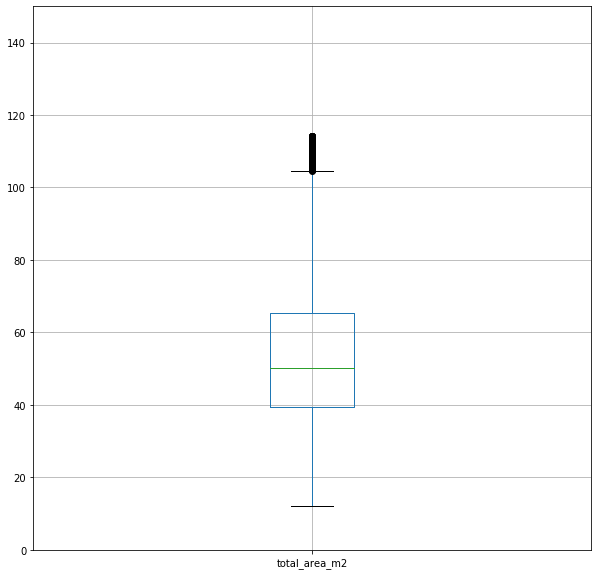

In [66]:
delete_outliers(df,'total_area_m2',1,10,10).set_ylim(0,150)

In [67]:
delete_outliers(df,'total_area_m2',0)['total_area_m2'].mean()

54.32568508435241

(0, 10000000)

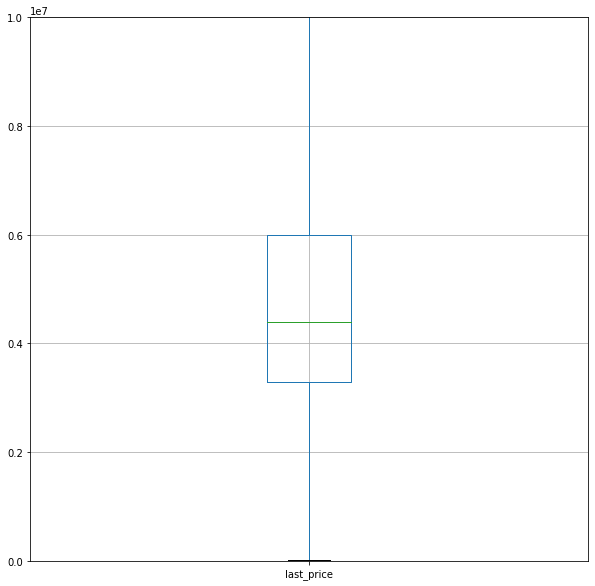

In [68]:
delete_outliers(df,'last_price',1,10,10).set_ylim(0, 10000000)

In [69]:
delete_outliers(df,'last_price',0)['last_price'].mean()

4838942.090946979

(0, 200)

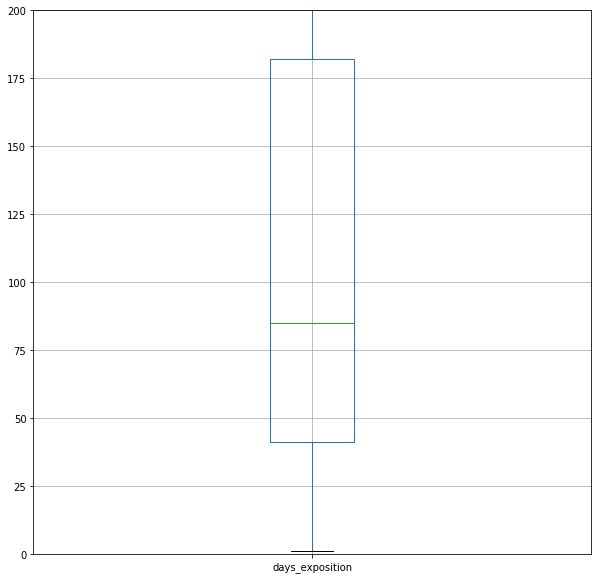

In [70]:
delete_outliers(df,'days_exposition',1,10,10).set_ylim(0, 200)

In [71]:
delete_outliers(df,'days_exposition',0)['days_exposition'].mean()

128.39811662055757

(0, 200000)

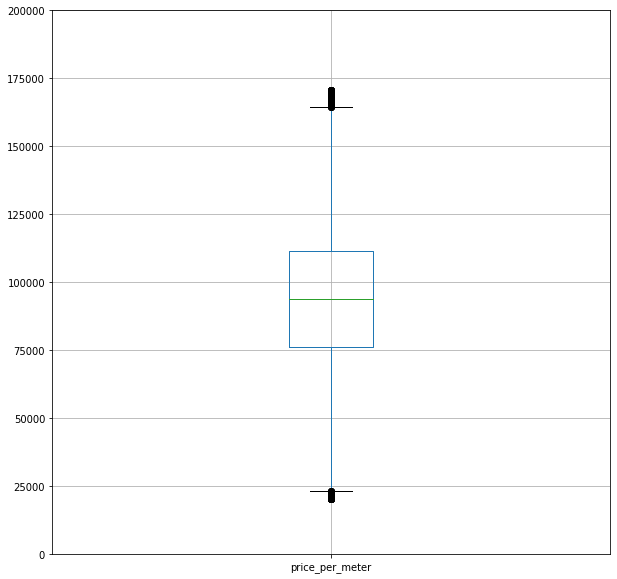

In [72]:
delete_outliers(df,'price_per_meter',1,10,10).set_ylim(0, 200000)

In [73]:
delete_outliers(df,'price_per_meter',0)['price_per_meter'].mean()

93773.45889844408

### Типичные средние параметры с выбросами и без:

|Характеристика    |С выбросами   |Без выбросов |
|:-----------------|-------------:|------------:|
|Площадь           |60            |54           |
|Цена за кв.м      |99,432        |93,773       |
|Стоимость квартиры|6,541,126     |4,838,942    |
|Возраст объявления|180           |120          |

----------

## <span style="color:green">Комментарий от наставника<span>
    
Йей, крутая автоматизация графиков и сравнительная таблица.

### Что можно сделать лучше:
* Таки лучше сделать таблицу рассчитываемой. Представь, если бы ты сделал ошибки в вычислениях до этого, пришлось бы переписывать всю табличку.


---------

## Какие факторы больше всего влияют на стоимость квартиры? Отдельно изучите, зависит ли цена квадратного метра от числа комнат, этажа (первого или последнего), удалённости от центра и даты размещения: дня недели, месяца и года.

In [74]:
df.head()

,town_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,building_series_id,is_apartment,is_studio,is_open_plan,total_images,last_price,first_day_exposition,day_of_week_exposition,month_exposition,year_exposition,days_exposition,city_center_distance_km,nearest_airport_distance_km,parks_numbers_within_3km,nearest_park_distance_km,ponds_number_within_3km,nearest_pond_distance_km,floor_status,price_per_meter,total_living_area_ratio,total_kitchen_area_ratio
0,санкт-петербург,108.00,51.00,25.00,2.70,3,nan,8,16.00,1564812,0,0,0,20,"13,000,000.00",2019-03-07,Thursday,March,2019,nan,16.03,18.86,1.00,0.48,2.00,0.76,другой,"120,370.37",0.47,0.23
1,поселок шушары,40.40,18.60,11.00,nan,1,2.00,1,11.00,NaN,0,0,0,7,"3,350,000.00",2018-12-04,Tuesday,December,2018,81.00,18.60,12.82,0.00,nan,0.00,nan,первый,"82,920.79",0.46,0.27
2,санкт-петербург,56.00,34.30,8.30,nan,2,0.00,4,5.00,Сталинский,0,0,0,10,"5,196,000.00",2015-08-20,Thursday,August,2015,558.00,13.93,21.74,1.00,0.09,2.00,0.57,другой,"92,785.71",0.61,0.15
3,санкт-петербург,159.00,nan,nan,nan,3,0.00,9,14.00,NaN,0,0,0,0,"64,900,000.00",2015-07-24,Friday,July,2015,424.00,6.80,28.10,2.00,0.08,3.00,0.23,другой,"408,176.10",nan,nan
4,санкт-петербург,100.00,32.00,41.00,3.03,2,nan,13,14.00,NaN,0,0,0,2,"10,000,000.00",2018-06-19,Tuesday,June,2018,121.00,8.10,31.86,2.00,0.11,1.00,0.05,другой,"100,000.00",0.32,0.41


In [75]:
corr = df[['price_per_meter',\
           'total_area_m2',\
           'last_price',\
           'days_exposition',\
           'city_center_distance_km',\
           'number_of_rooms']].corr()
corr.style.background_gradient(cmap='coolwarm')

,price_per_meter,total_area_m2,last_price,days_exposition,city_center_distance_km,number_of_rooms
price_per_meter,1,0.302202,0.736562,0.0477104,-0.318099,0.0554705
total_area_m2,0.302202,1,0.653743,0.149571,-0.231904,0.758745
last_price,0.736562,0.653743,1,0.0809375,-0.206887,0.363421
days_exposition,0.0477104,0.149571,0.0809375,1,-0.0594809,0.126497
city_center_distance_km,-0.318099,-0.231904,-0.206887,-0.0594809,1,-0.184322
number_of_rooms,0.0554705,0.758745,0.363421,0.126497,-0.184322,1


----------

## <span style="color:green">Комментарий от наставника<span>

Для красивости еще можно было округлить числа до сотых. Отличное оформление корреляции.

### Что можно сделать лучше:
* `last_price` не нужно включать в анализ корреляции, потому что `price_per_meter` рассчитывается по ней. Естественно, будет практически линейная взаимосвязь. Но она не несёт дополнительной информации. 

---------

### Вывод капитана очевидности
На стоимость квадратного метра квартиры сильнее всего влияет итоговая цена и количество комнат. Ну и отрицательная корреляция между стоимостью за квадрат и центром тоже имеет место быть.
Предположу, что на самом деле еще сильнее влияют ожидания и референсы продавца.

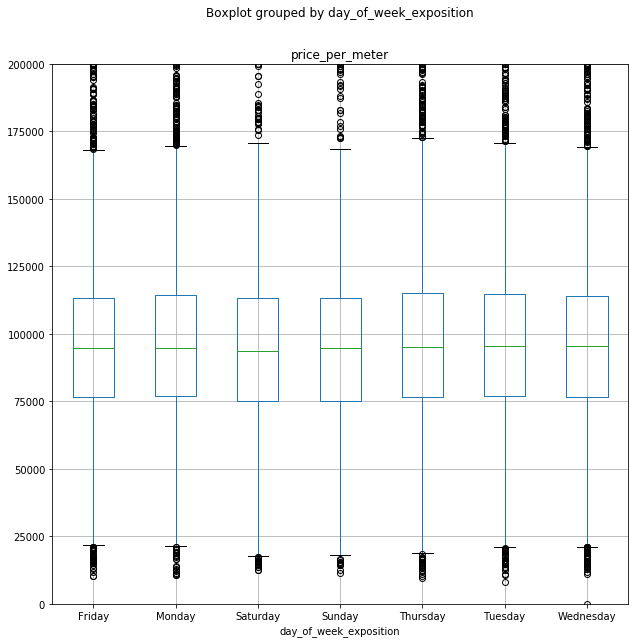

In [76]:
plot = df.boxplot('price_per_meter', by='day_of_week_exposition',figsize=(10,10)).set_ylim(0,200000)

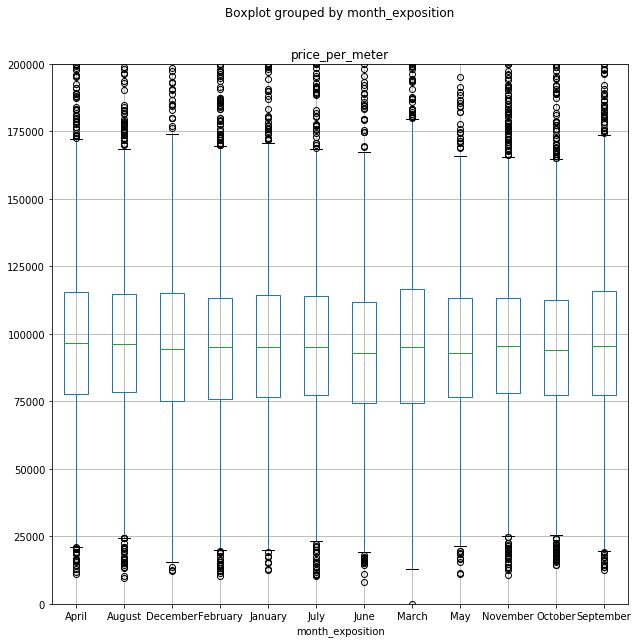

In [77]:
plot = df.boxplot('price_per_meter', by='month_exposition',figsize=(10,10)).set_ylim(0,200000)

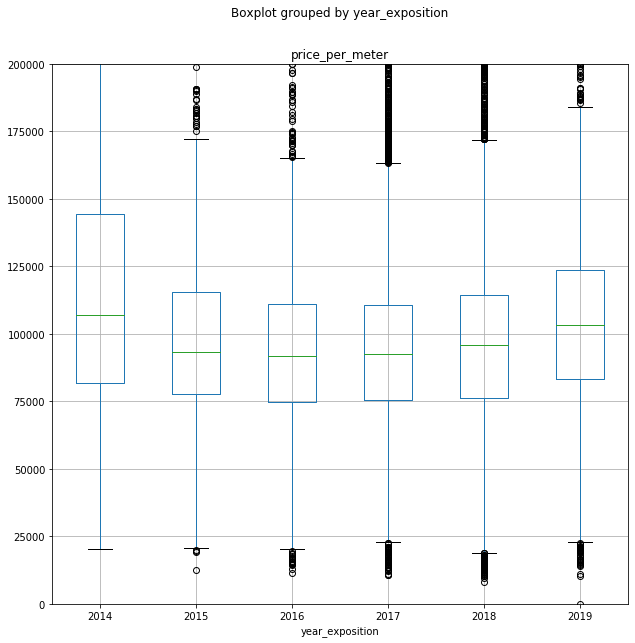

In [78]:
plot = df.boxplot('price_per_meter', by='year_exposition',figsize=(10,10)).set_ylim(0,200000)

(0, 200000)

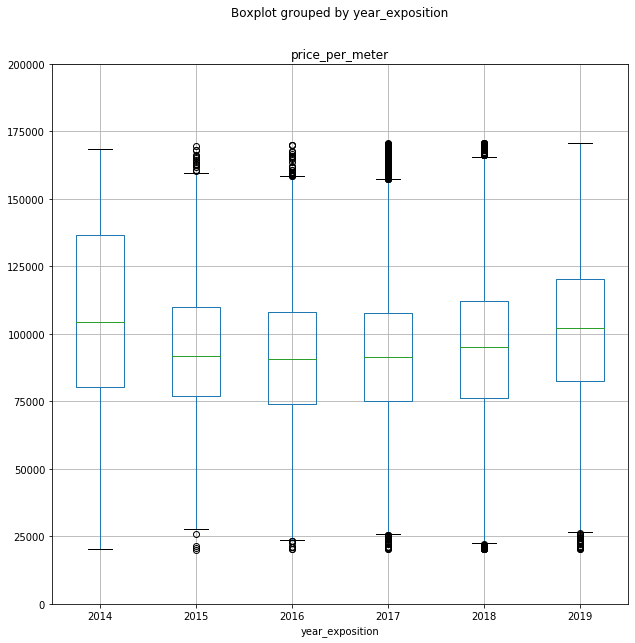

In [79]:
delete_outliers(df,'price_per_meter',0).boxplot('price_per_meter', by='year_exposition',figsize=(10,10)).set_ylim(0,200000)

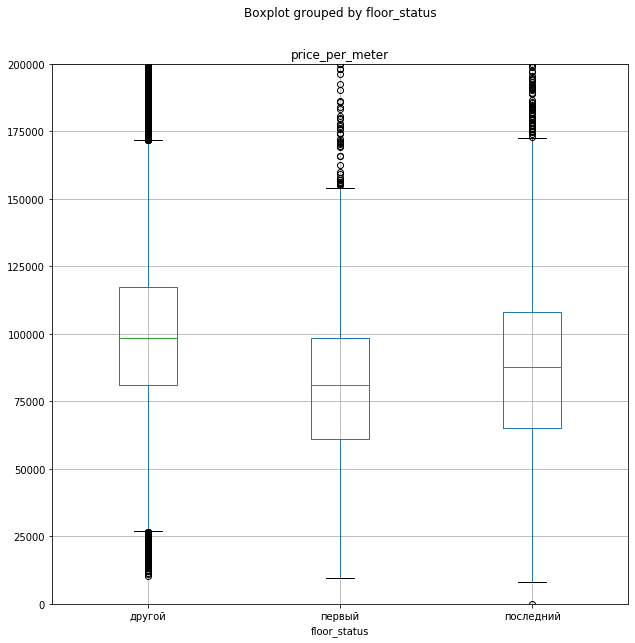

In [80]:
plot = df.boxplot('price_per_meter', by='floor_status',figsize=(10,10)).set_ylim(0,200000)

(0, 200000)

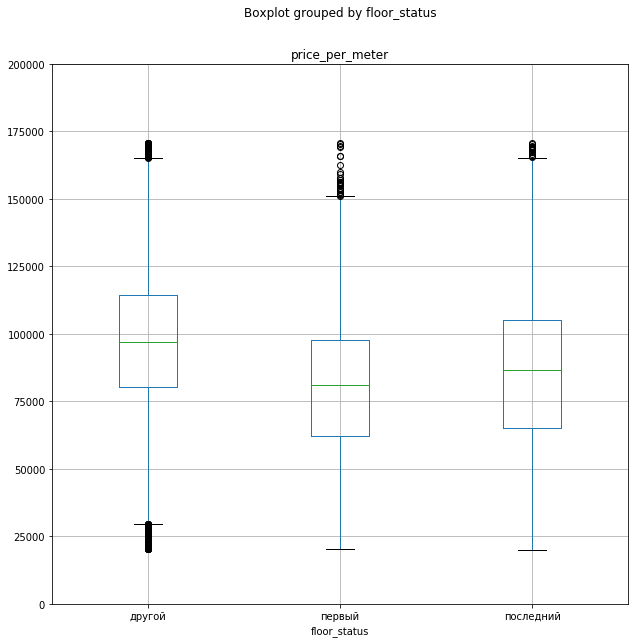

In [81]:
delete_outliers(df,'price_per_meter',0).boxplot('price_per_meter', by='floor_status',figsize=(10,10)).set_ylim(0,200000)

### Никаких подозрительных моментов.
Все в пределах динамики экономики с РФ в соответствии с годами. День, месяц, год, фаза луны — безразлично.
Однозначно можно сказать, что квартиры на первом этаже стоят дешевле остальных.

----------

## <span style="color:green">Комментарий от наставника<span>

Между графиками здесь и выше не хватает предварительных выводов. Так заказчику будет понятнее, какие выводы ты сделал из каждого графика. Либо можно их распечатать помельче и сгруппировать в сетку, чтобы сделать один общий вывод. Сейчас я читаю вывод и листаю наверх, чтобы посмотреть график.

---------

### Что можно сказать о цене квадратного метра в пригородах? Выберите 10 населённых пунктов с наибольшим числом объявлений.


In [82]:
df.head()

,town_name,total_area_m2,living_area_m2,kitchen_area_m2,ceiling_height_m,number_of_rooms,number_of_balconies,floor,total_floors_in_house,building_series_id,is_apartment,is_studio,is_open_plan,total_images,last_price,first_day_exposition,day_of_week_exposition,month_exposition,year_exposition,days_exposition,city_center_distance_km,nearest_airport_distance_km,parks_numbers_within_3km,nearest_park_distance_km,ponds_number_within_3km,nearest_pond_distance_km,floor_status,price_per_meter,total_living_area_ratio,total_kitchen_area_ratio
0,санкт-петербург,108.00,51.00,25.00,2.70,3,nan,8,16.00,1564812,0,0,0,20,"13,000,000.00",2019-03-07,Thursday,March,2019,nan,16.03,18.86,1.00,0.48,2.00,0.76,другой,"120,370.37",0.47,0.23
1,поселок шушары,40.40,18.60,11.00,nan,1,2.00,1,11.00,NaN,0,0,0,7,"3,350,000.00",2018-12-04,Tuesday,December,2018,81.00,18.60,12.82,0.00,nan,0.00,nan,первый,"82,920.79",0.46,0.27
2,санкт-петербург,56.00,34.30,8.30,nan,2,0.00,4,5.00,Сталинский,0,0,0,10,"5,196,000.00",2015-08-20,Thursday,August,2015,558.00,13.93,21.74,1.00,0.09,2.00,0.57,другой,"92,785.71",0.61,0.15
3,санкт-петербург,159.00,nan,nan,nan,3,0.00,9,14.00,NaN,0,0,0,0,"64,900,000.00",2015-07-24,Friday,July,2015,424.00,6.80,28.10,2.00,0.08,3.00,0.23,другой,"408,176.10",nan,nan
4,санкт-петербург,100.00,32.00,41.00,3.03,2,nan,13,14.00,NaN,0,0,0,2,"10,000,000.00",2018-06-19,Tuesday,June,2018,121.00,8.10,31.86,2.00,0.11,1.00,0.05,другой,"100,000.00",0.32,0.41


In [83]:
(df['town_name'].value_counts() / df.shape[0] * 100).head(11)

санкт-петербург     66.47
поселок мурино       2.35
поселок шушары       1.86
всеволожск           1.68
пушкин               1.56
колпино              1.43
поселок парголово    1.38
гатчина              1.30
деревня кудрово      1.26
выборг               1.00
петергоф             0.85
Name: town_name, dtype: float64

Так как нет фильтра что является городом, деревней или ПГТ, то будем считать все, кроме Питера — пригородом. Посмотрим на топ 20 по стоимости квадратного метра. Тем более распределение выглядит как 66 в Питере на 33 не в нем.

In [84]:
df.groupby('town_name').agg({'price_per_meter':'mean'}).sort_values(by='price_per_meter', ascending=False).head(20)

,price_per_meter
town_name,
зеленогорск,"115,122.80"
санкт-петербург,"114,849.01"
поселок репино,"104,238.61"
пушкин,"103,125.82"
сестрорецк,"101,757.62"
поселок лисий нос,"100,660.82"
кудрово,"100,253.04"
деревня мистолово,"98,549.98"
поселок левашово,"96,997.69"


In [85]:
def town_status(row):
    if row['town_name'] == 'санкт-петербург':
        return 'Питер'
    else:
        return 'За Питером'

In [86]:
df['town_status'] = df.apply(town_status, axis=1)

In [87]:
df.groupby('town_status').agg({'price_per_meter':'mean'}).sort_values(by='price_per_meter')

,price_per_meter
town_status,
За Питером,"68,865.10"
Питер,"114,849.01"


In [88]:
df.groupby('town_status').agg({'price_per_meter':'median'}).sort_values(by='price_per_meter')

,price_per_meter
town_status,
За Питером,"68,728.52"
Питер,"104,761.90"


----------

## <span style="color:green">Комментарий от наставника<span>

В `.agg()` можно применить словарь вида `{колонка1: [статистика1, статистика2], колонка2: [статистика3]}`. В твоем случае `{'price_per_meter': ['mean', 'median']}`. То же самое можно использовать в `pivot_table()` :)

---------

(0, 200000)

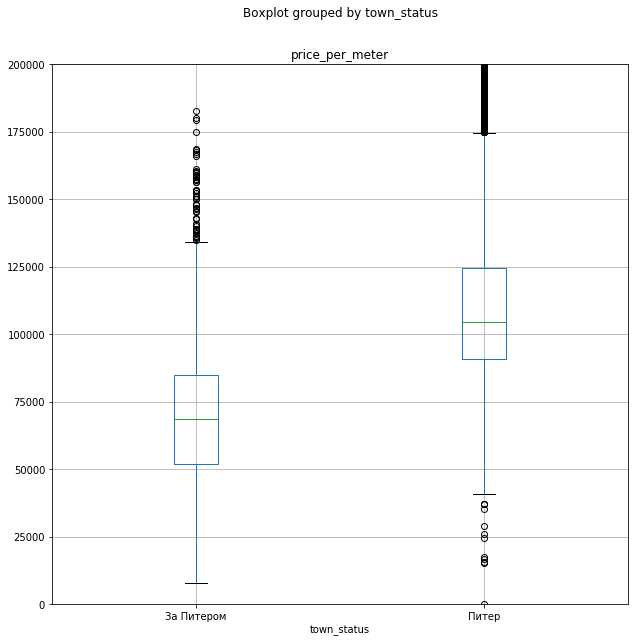

In [89]:
plot = df.boxplot('price_per_meter', by='town_status', figsize=(10,10))
plot.set_ylim(0,200000)

In [90]:
top_10_df = df.groupby('town_name')\
    .agg({'town_status':'count','price_per_meter':'mean'})
top_10_df = top_10_df.sort_values('town_status', ascending=False).head(11)

In [91]:
top_10_df.sort_values('price_per_meter', ascending=False).head(11)

,town_status,price_per_meter
town_name,,
санкт-петербург,15721,"114,849.01"
пушкин,369,"103,125.82"
деревня кудрово,299,"92,473.55"
поселок парголово,327,"90,175.91"
поселок мурино,556,"85,681.76"
петергоф,201,"84,757.56"
поселок шушары,440,"78,677.36"
колпино,338,"75,424.58"
гатчина,307,"68,746.15"


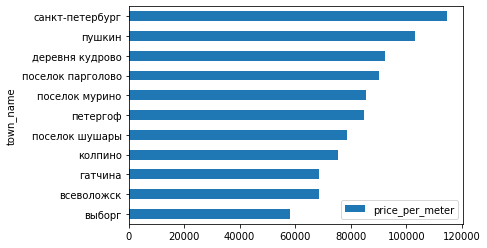

In [92]:
top_10_df.sort_values('price_per_meter', ascending=True)\
    .drop('town_status', axis=1).plot(kind='barh')

In [93]:
(df['town_name'].value_counts() / df.shape[0] * 100).head(11)

санкт-петербург     66.47
поселок мурино       2.35
поселок шушары       1.86
всеволожск           1.68
пушкин               1.56
колпино              1.43
поселок парголово    1.38
гатчина              1.30
деревня кудрово      1.26
выборг               1.00
петергоф             0.85
Name: town_name, dtype: float64

In [94]:
top_10_df.sort_values(by='price_per_meter', ascending=False)

,town_status,price_per_meter
town_name,,
санкт-петербург,15721,"114,849.01"
пушкин,369,"103,125.82"
деревня кудрово,299,"92,473.55"
поселок парголово,327,"90,175.91"
поселок мурино,556,"85,681.76"
петергоф,201,"84,757.56"
поселок шушары,440,"78,677.36"
колпино,338,"75,424.58"
гатчина,307,"68,746.15"


----------

## <span style="color:green">Комментарий от наставника<span>

В ячейках [93], [94] повторяется код из [83] и [91] соответственно. Не поняла, для чего :)

---------

In [95]:
top_10_list = top_10_df.reset_index().town_name.to_list()

In [96]:
top_10_list

['санкт-петербург',
 'поселок мурино',
 'поселок шушары',
 'всеволожск',
 'пушкин',
 'колпино',
 'поселок парголово',
 'гатчина',
 'деревня кудрово',
 'выборг',
 'петергоф']

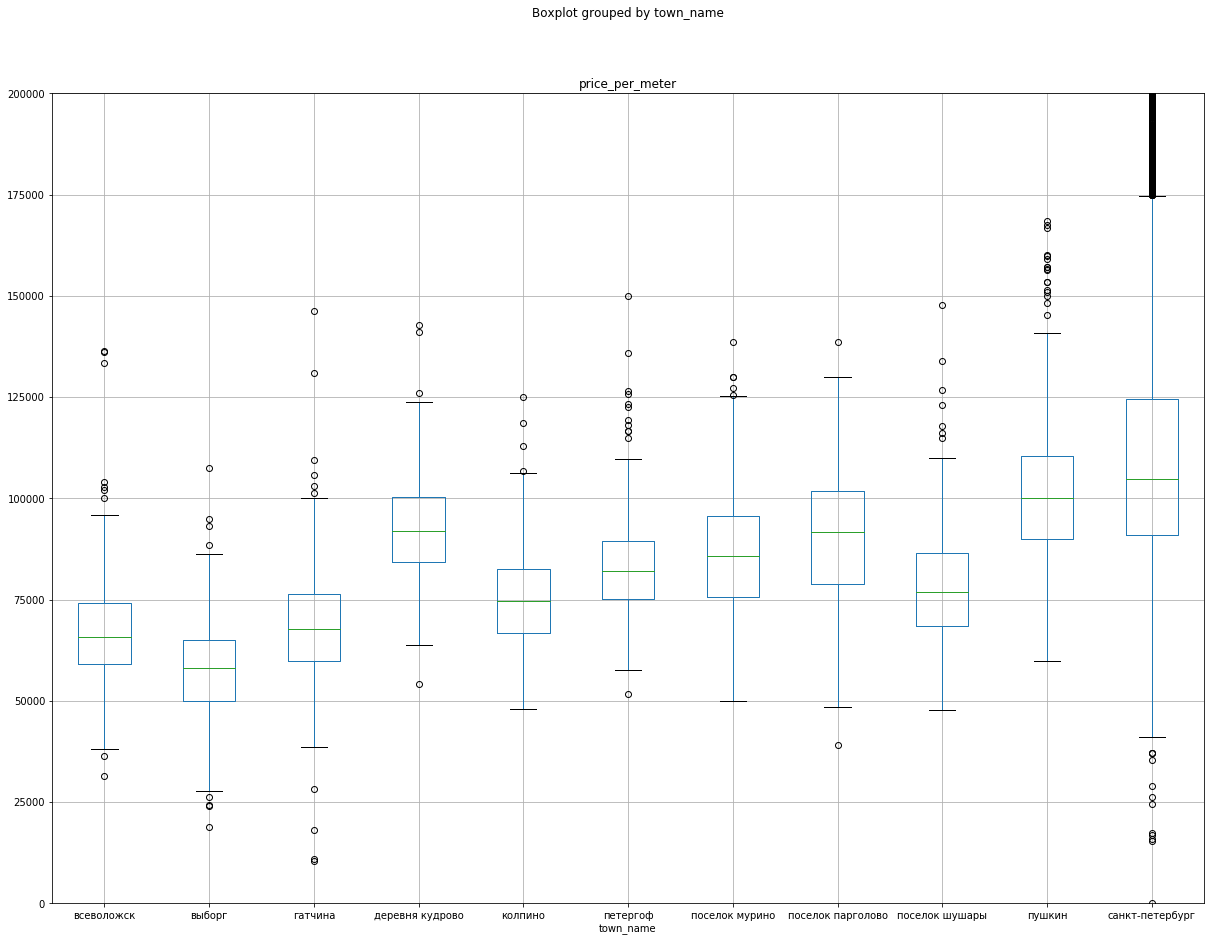

In [97]:
plot = df[df.town_name.isin(top_10_list)]\
    .boxplot('price_per_meter', by='town_name',figsize=(20,15))\
    .set_ylim(0,200000)

### Логично, за Питером жилье продают дешевле.
В Питере дорого, в Выборге дешево.

## Выделите сегменты типичных квартир в центре (по удалённости, числу комнат и площади) и вне центра. Границы определите самостоятельно. Выберите достаточно крупные сегменты с не менее 1000 объявлений. Сравните корреляцию основных факторов с ценой по всем предложениям и объявлениям в вашей выборке.

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 31 columns):
town_name                      23650 non-null object
total_area_m2                  23650 non-null float64
living_area_m2                 21752 non-null float64
kitchen_area_m2                21381 non-null float64
ceiling_height_m               14490 non-null float64
number_of_rooms                23650 non-null int64
number_of_balconies            12137 non-null float64
floor                          23650 non-null int64
total_floors_in_house          23565 non-null float64
building_series_id             6515 non-null object
is_apartment                   23650 non-null int16
is_studio                      23650 non-null int16
is_open_plan                   23650 non-null int16
total_images                   23650 non-null int64
last_price                     23650 non-null float64
first_day_exposition           23650 non-null datetime64[ns]
day_of_week_exposition         2365

In [99]:
# Посмотрим сколько ненулевых значений
18139 / df.shape[0]

0.7669767441860466

3/4, устраивает, заполнять не будем, так как не понятно, чем заполнять. Медиана или среднее может ухудшить набор данных.
Есть вероятность, что пользователям просто лениво заполнять или они понятия не имеют сколько метров до парка, даже если он рядом.

In [100]:
city_center_df = df.dropna(subset=['city_center_distance_km'])

In [101]:
city_center_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18139 entries, 0 to 23697
Data columns (total 31 columns):
town_name                      18139 non-null object
total_area_m2                  18139 non-null float64
living_area_m2                 16863 non-null float64
kitchen_area_m2                16583 non-null float64
ceiling_height_m               11548 non-null float64
number_of_rooms                18139 non-null int64
number_of_balconies            9332 non-null float64
floor                          18139 non-null int64
total_floors_in_house          18064 non-null float64
building_series_id             6147 non-null object
is_apartment                   18139 non-null int16
is_studio                      18139 non-null int16
is_open_plan                   18139 non-null int16
total_images                   18139 non-null int64
last_price                     18139 non-null float64
first_day_exposition           18139 non-null datetime64[ns]
day_of_week_exposition         18139

In [102]:
city_center_df['city_center_distance_km'].quantile([0.25,0.5,0.75,1])

0.25    9.24
0.50   13.11
0.75   16.29
1.00   65.97
Name: city_center_distance_km, dtype: float64

In [103]:
# Обозначим 9 км, как сегмент и посмотрим больше 1 тысячи строк в нем или нет.
len(city_center_df.query('city_center_distance_km <= 9'))

4382

In [104]:
# Ок, подходит.
city_center_in_9_km_df = city_center_df.query('city_center_distance_km < 9')

In [105]:
cor_in_center = city_center_in_9_km_df.corr()\
        .sort_values('last_price', ascending=False)\
        .filter(items = ['last_price'])\
        .reset_index()
cor_in_center.style.background_gradient('coolwarm')

,index,last_price
0,last_price,1
1,price_per_meter,0.776956
2,total_area_m2,0.641044
3,living_area_m2,0.545322
4,kitchen_area_m2,0.506961
5,number_of_rooms,0.34509
6,total_images,0.131064
7,ponds_number_within_3km,0.116041
8,parks_numbers_within_3km,0.111203
9,floor,0.10671


In [106]:
city_center_out_9_km_df = city_center_df.query('city_center_distance_km > 9')

In [107]:
cor_out_center = city_center_out_9_km_df.corr()\
        .sort_values('last_price', ascending=False)\
        .filter(items = ['last_price'])\
        .reset_index()
cor_out_center.style.background_gradient('coolwarm')

,index,last_price
0,last_price,1
1,total_area_m2,0.819791
2,living_area_m2,0.69879
3,kitchen_area_m2,0.639293
4,number_of_rooms,0.518997
5,price_per_meter,0.518153
6,number_of_balconies,0.228466
7,total_images,0.193682
8,total_floors_in_house,0.136178
9,floor,0.116915


In [108]:
# Склеим таблицы
cor_in_out_center = cor_in_center.merge(cor_out_center, on='index')
cor_in_out_center = cor_in_out_center.rename(columns={'last_price_x':'cor_in_center', 'last_price_y':'cor_out_center'})
cor_in_out_center.style.background_gradient('coolwarm')

,index,cor_in_center,cor_out_center
0,last_price,1,1
1,price_per_meter,0.776956,0.518153
2,total_area_m2,0.641044,0.819791
3,living_area_m2,0.545322,0.69879
4,kitchen_area_m2,0.506961,0.639293
5,number_of_rooms,0.34509,0.518997
6,total_images,0.131064,0.193682
7,ponds_number_within_3km,0.116041,0.0877116
8,parks_numbers_within_3km,0.111203,0.091329
9,floor,0.10671,0.116915


### Что для центра хорошо, для переферии — смерть.
В центре имеет значение:
    - Цена за квадрат
    - Все виды площадей
    - Количество комнат
    - И даже парки с водоемами набрали 10%
    
    
Тем временем на переферерии:
    - Площади
    - Количество комнат
    - Цена за квадрат
    - Балконы
    - Этаж
    
На самом деле, я бы не сказал, что потребности как-то серьезно отличаются. Плюс мы сравнивали 2 набора данных, которые не были соразмерными друг другу.

## Подберите наиболее характерные параметры для апартаментов, студий и квартир свободной планировки. Влияют ли они на цену? Сравните со схожими параметрами квартир типовой планировки.

In [109]:
# Уточним количество по каждой категории.

In [110]:
df['is_apartment'].value_counts()

0    23600
1       50
Name: is_apartment, dtype: int64

In [111]:
df['is_studio'].value_counts()

0    23501
1      149
Name: is_studio, dtype: int64

In [112]:
df['is_open_plan'].value_counts()

0    23583
1       67
Name: is_open_plan, dtype: int64

In [113]:
# Выглядит немного странно, так как сравнивать придется наборы с максимальным количеством с 149 строк против 23 тысяч.
# Вроде бы нужна какая-нибудь балансировка или нормализация.

In [114]:
apartment_df = df.query('is_apartment == 1')
studio_df = df.query('is_studio == 1')
open_plan_df = df.query('is_open_plan == 1')
ordinary_df = df.query('is_apartment == 0 & is_studio == 0 & is_open_plan == 0')

In [115]:
apartment_cor = apartment_df.corr()\
        .filter(items = ['last_price'])\
        .sort_values('last_price', ascending=False)\
        .reset_index()\
        .rename(columns={'last_price':'apartment_cor'})

In [116]:
studio_cor = studio_df.corr()\
        .filter(items = ['last_price'])\
        .sort_values('last_price', ascending=False)\
        .reset_index()\
        .rename(columns={'last_price':'studio_cor'})

In [117]:
open_plan_cor = open_plan_df.corr()\
        .filter(items = ['last_price'])\
        .sort_values('last_price', ascending=False)\
        .reset_index()\
        .rename(columns={'last_price':'open_plan_cor'})

In [118]:
ordinary_cor = ordinary_df.corr()\
        .filter(items = ['last_price'])\
        .sort_values('last_price', ascending=False)\
        .reset_index()\
        .rename(columns={'last_price':'ordinary_cor'})

----------

## <span style="color:green">Комментарий от наставника<span>

Конструкции в [115]-[118] ячейках лучше заменить на функцию, чтобы сократить код и ручной труд :) 

Насчёт комментария по балансировке, иногда приходится работать с тем, что есть :( Я бы не выкидывала данные с датафрейма по обычной планировке, наоброт, больше данных дадут больше точности. 

---------

In [119]:
final_corr = apartment_cor.merge(studio_cor)
final_corr = final_corr.merge(open_plan_cor)
final_corr = final_corr.merge(ordinary_cor)
final_corr

,index,apartment_cor,studio_cor,open_plan_cor,ordinary_cor
0,last_price,1.00,1.00,1.00,1.00
1,living_area_m2,0.83,0.74,0.83,0.56
2,total_area_m2,0.81,0.85,0.96,0.65
3,kitchen_area_m2,0.70,nan,nan,0.52
4,days_exposition,0.67,0.13,0.02,0.08
5,price_per_meter,0.57,0.60,0.66,0.74
6,parks_numbers_within_3km,0.45,0.00,0.30,0.15
7,number_of_rooms,0.40,-0.05,0.39,0.36
8,ponds_number_within_3km,0.29,0.01,0.19,0.16
9,floor,0.12,-0.05,-0.08,0.03


### Да, значения не равны и отличны друг от друга, но скорее причины другие.
Так, например, корреляция у апартаментов и удаленности от центра отрицательная, но скорее всего дело в том, что не апартаменты далеко от центра — редкость.

<a name="stage_4"></a>
# Этап 4. Результаты исследования
 - Апартаменты дешевле, чем все остальные квартиры.
 - Квартиры в центре и в Питере обычно дороже, чем квартиры вне центра и за Питером.
 - Но не всегда, видимо, присутствуют коттеджные поселки или элитная недвижимость.
 - Датасет с выбросами и датасет без выбросов дает примерно один и тот же результат, применительно к текущим задачам один: вряд ли важно цена за квадрат 90 или 95 тысяч, это ни на что не влияет.

## Рекомендации для площадки объявлений
    - Уделить внимание правилам валидации на сервере, чтобы больше не сталкиваться с проблемой отсутствующих значений.
    - Продумать сценарий, при котором данные до парков, водоемов, аэропортов будут подтягиваться автоматически.
    - Продумать сценарий, при котором серии домов будут подтягиваться автоматически.
    - Считать расстояние в километрах и целых числах.
    - Предупреждать пользователей о возможных некорректных значениях или показывать референс: "в вашем доме квартиры
    стоят примерно столько".
[Наверх к оглавлению](#contents)

![title](https://thumb.cloud.mail.ru/weblink/thumb/xw1/zAWQ/3zbAv66tx/1565523383826.jpg)

----------

## <span style="color:green">Комментарий от наставника<span>
    
Ура, поздравляю со сдачей второго проекта!

Очень красивая работа! Приятно и интересно читать. Использовал много фишек: colormap в таблицах, формат чисел в самом начале, модификация и автоматизация графиков.

Про мелкие погрешности или улучшения я написала в комментариях. 

Жду третий проект ^_^

![](https://www.infpol.ru/upload/resize_cache/iblock/23d/600_6000_1/23d88d5d187d0d5808e1522dea52dddb.jpg)

---------